In [1]:
import numpy as np
import scipy as sp
from importlib import reload
import neuraltda.topology2 as tp2
import neuraltda.plotting as tpplt
import neuraltda.spikeutils as su
import glob
import os
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

# Setup figure save path
daystr = datetime.datetime.now().strftime('%Y%m%d')
figsavepth = '/home/brad/DailyLog/'+daystr+'/'
print(figsavepth)

/home/brad/.conda/envs/neuraltda-4/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters

Bad key "nbagg.transparent" on line 426 in
/home/brad/.conda/envs/neuraltda-4/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key "animation.mencoder_path" on line 509 in
/home/brad/.conda/envs/neuraltda-4/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.1/matplotlibrc.template
or from the matplotlib source distr

/home/brad/DailyLog/20200602/


In [2]:
# Set up birds and block_paths
birds = ['B1083', 'B1083-2', 'B1056', 'B1235', 'B1075']
bps = {'B1083': '/home/brad/krista/B1083/P03S03/', 'B1075': '/home/brad/krista/B1075/P01S03/',
       'B1235': '/home/brad/krista/B1235/P02S01/', 'B1056': '/home/brad/krista/B1056/klusta/phy020516/Pen01_Lft_AP100_ML1300__Site03_Z2500__B1056_cat_P01_S03_1/',
       'B1056': '/home/brad/krista/B1056/klusta/phy020516/Pen01_Lft_AP100_ML1300__Site03_Z2500__B1056_cat_P01_S03_1/',
       'B1083-2': '/home/brad/krista/B1083/P03S05/'}

# Binning Parameters
windt = 10                      # milliseconds
dtovr = 0.0*windt                 # milliseconds
segment_info = [0, 0]             # use full Trial
cluster_group = ['Good']          # use just good clusters
comment = 'PSTHCORRCOEFF'        # BootStrap Populations
bdfs = {}                         # Dictionary to store bdf



In [3]:
# Loop through each bird in our list and bin the data
for bird in birds:
    block_path = bps[bird]
    bfdict = tp2.dag_bin(block_path, windt, segment_info, cluster_group=cluster_group, dt_overlap=dtovr, comment=comment)
    bdf = glob.glob(os.path.join(bfdict['raw'], '*.binned'))[0]
    print(bdf)
    bdfs[bird] = bdf

Data Not already binned
Nreps = 20
skip = 200
dur = 120000.0
nwins = 600
Nreps = 20
skip = 200
dur = 120000.0
nwins = 600
Nreps = 20
skip = 200
dur = 120000.0
nwins = 600
Nreps = 20
skip = 200
dur = 120000.0
nwins = 600
Nreps = 20
skip = 200
dur = 120000.0
nwins = 600
Nreps = 20
skip = 200
dur = 120000.0
nwins = 600
Nreps = 20
skip = 200
dur = 120000.0
nwins = 600
Nreps = 20
skip = 200
dur = 120000.0
nwins = 600
/home/brad/krista/B1083/P03S03/binned_data/win-10_dtovr-0.0_seg-0-0-PSTHCORRCOEFF/20200602T174022Z-10-0.0.binned
Data Not already binned
Nreps = 20
skip = 200
dur = 120000.0
nwins = 600
Nreps = 20
skip = 200
dur = 120000.0
nwins = 600
Nreps = 20
skip = 200
dur = 120000.0
nwins = 600
Nreps = 20
skip = 200
dur = 120000.0
nwins = 600
Nreps = 20
skip = 200
dur = 120000.0
nwins = 600
Nreps = 20
skip = 200
dur = 120000.0
nwins = 600
Nreps = 20
skip = 200
dur = 120000.0
nwins = 600
Nreps = 20
skip = 200
dur = 120000.0
nwins = 600
/home/brad/krista/B1083/P03S05/binned_data/win-10_dtovr

In [23]:
import h5py as h5
bdf = bdfs['B1235']
with h5.File(bdf, 'r') as f:
    stims = f.keys()
    pop_tensors = []
    for stim in stims:
        pop_tensors.append(np.array(f[stim]['pop_tens']))
    all_pop_tens = np.stack(pop_tensors, axis=0)
    all_pop_tens = np.transpose(all_pop_tens, [2, 1,0,3])
    print(all_pop_tens.shape)
    all_pop_tens = np.reshape(all_pop_tens, [all_pop_tens.shape[0], -1], order='C')
all_pop_tens.shape

(663, 40, 16, 20)


(663, 12800)

In [24]:
corr_mtx = np.corrcoef(all_pop_tens, rowvar=False)

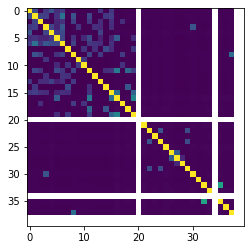

In [27]:
plt.imshow(corr_mtx[0:40, 0:40])

In [30]:
y = corr_mtx.reshape(corr_mtx.shape[0]//20, 20, corr_mtx.shape[1]//20, 20)

In [36]:
avg = np.nanmean(y, axis=(1,3))
avg.shape

(640, 640)

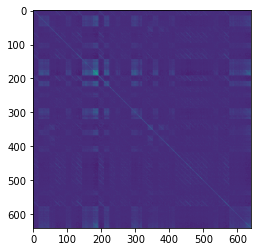

In [37]:
plt.imshow(avg)